In [1]:
import os
os.getcwd()

'C:\\Users\\amang'

In [3]:
import os

for root, dirs, files in os.walk("./training_data"):
    print(root, "->", len(files), "files")
    # Stop after a few lines to avoid clutter
    if len(root.split(os.sep)) > 2:
        break

./training_data -> 0 files
./training_data\archive_1 -> 0 files
./training_data\archive_1\s1 -> 10 files


In [5]:
import os, shutil, random
from pathlib import Path

EXTRACT_DIR = "./training_data"
TEST_DIR = "./test_data"
IMAGES_PER_PERSON_FOR_TEST = 2  # number of test images per subject

os.makedirs(TEST_DIR, exist_ok=True)
random.seed(1)

# Go through each subject
for subject in sorted(os.listdir(EXTRACT_DIR)):
    src_dir = os.path.join(EXTRACT_DIR, subject)
    if not os.path.isdir(src_dir):
        continue
    imgs = [f for f in os.listdir(src_dir)
            if not f.startswith('.') and os.path.isfile(os.path.join(src_dir, f))]
    if len(imgs) == 0:
        continue
    chosen = random.sample(imgs, min(IMAGES_PER_PERSON_FOR_TEST, len(imgs)))
    dst_dir = os.path.join(TEST_DIR, subject)
    os.makedirs(dst_dir, exist_ok=True)
    for img in chosen:
        shutil.copy(os.path.join(src_dir, img), os.path.join(dst_dir, img))

print("✅ Test set created successfully in:", TEST_DIR)


✅ Test set created successfully in: ./test_data


In [7]:
for root, dirs, files in os.walk("./test_data"):
    print(root, "->", len(files), "files")


./test_data -> 0 files
./test_data\s1 -> 2 files
./test_data\s2 -> 2 files
./test_data\s3 -> 2 files
./test_data\s4 -> 2 files


In [9]:
import os

for root, dirs, files in os.walk("./training_data"):
    print(root, "->", len(files), "files")

./training_data -> 0 files
./training_data\archive_1 -> 0 files
./training_data\archive_1\s1 -> 10 files
./training_data\archive_1\s2 -> 10 files
./training_data\archive_1\s3 -> 10 files
./training_data\archive_1\s4 -> 10 files
./training_data\github dataset -> 0 files
./training_data\github dataset\s1 -> 10 files
./training_data\github dataset\s10 -> 10 files
./training_data\github dataset\s11 -> 10 files
./training_data\github dataset\s12 -> 10 files
./training_data\github dataset\s13 -> 10 files
./training_data\github dataset\s14 -> 10 files
./training_data\github dataset\s15 -> 10 files
./training_data\github dataset\s16 -> 10 files
./training_data\github dataset\s17 -> 10 files
./training_data\github dataset\s18 -> 10 files
./training_data\github dataset\s19 -> 10 files
./training_data\github dataset\s2 -> 10 files
./training_data\github dataset\s20 -> 10 files
./training_data\github dataset\s3 -> 10 files
./training_data\github dataset\s4 -> 10 files
./training_data\github datase

In [11]:
import shutil, os
from pathlib import Path

root = Path("./training_data")
entries = [p for p in root.iterdir() if p.is_dir()]

# If there is only one inner folder (archive_1), move its contents up
if len(entries) == 1 and entries[0].name == "archive_1":
    inner = entries[0]
    for sub in inner.iterdir():
        shutil.move(str(sub), str(root / sub.name))
    print(f"Moved all subject folders from {inner} to {root}")
else:
    print("Nothing to move — already flattened.")


Nothing to move — already flattened.


In [13]:
for root, dirs, files in os.walk("./training_data"):
    print(root, "->", len(files), "files")


./training_data -> 0 files
./training_data\archive_1 -> 0 files
./training_data\archive_1\s1 -> 10 files
./training_data\archive_1\s2 -> 10 files
./training_data\archive_1\s3 -> 10 files
./training_data\archive_1\s4 -> 10 files
./training_data\github dataset -> 0 files
./training_data\github dataset\s1 -> 10 files
./training_data\github dataset\s10 -> 10 files
./training_data\github dataset\s11 -> 10 files
./training_data\github dataset\s12 -> 10 files
./training_data\github dataset\s13 -> 10 files
./training_data\github dataset\s14 -> 10 files
./training_data\github dataset\s15 -> 10 files
./training_data\github dataset\s16 -> 10 files
./training_data\github dataset\s17 -> 10 files
./training_data\github dataset\s18 -> 10 files
./training_data\github dataset\s19 -> 10 files
./training_data\github dataset\s2 -> 10 files
./training_data\github dataset\s20 -> 10 files
./training_data\github dataset\s3 -> 10 files
./training_data\github dataset\s4 -> 10 files
./training_data\github datase

In [15]:
import os, shutil, random

EXTRACT_DIR = "./training_data"
TEST_DIR = "./test_data"
IMAGES_PER_PERSON_FOR_TEST = 2

os.makedirs(TEST_DIR, exist_ok=True)
random.seed(1)

for subject in sorted(os.listdir(EXTRACT_DIR)):
    src_dir = os.path.join(EXTRACT_DIR, subject)
    if not os.path.isdir(src_dir):
        continue
    imgs = [f for f in os.listdir(src_dir)
            if not f.startswith('.') and os.path.isfile(os.path.join(src_dir, f))]
    if len(imgs) == 0:
        continue
    chosen = random.sample(imgs, min(IMAGES_PER_PERSON_FOR_TEST, len(imgs)))
    dst_dir = os.path.join(TEST_DIR, subject)
    os.makedirs(dst_dir, exist_ok=True)
    for img in chosen:
        shutil.copy(os.path.join(src_dir, img), os.path.join(dst_dir, img))

print("✅ Test set created successfully in:", TEST_DIR)


✅ Test set created successfully in: ./test_data


In [17]:
for root, dirs, files in os.walk("./test_data"):
    print(root, "->", len(files), "files")


./test_data -> 0 files
./test_data\s1 -> 2 files
./test_data\s2 -> 2 files
./test_data\s3 -> 2 files
./test_data\s4 -> 2 files


In [19]:
from __future__ import division
import os
import numpy as np
import scipy.stats as ss
import cv2
import matplotlib.pyplot as plt
import fnmatch
import re
import collections

# ✅ Use your local folders here (NOT the original C:\fsu path)
IMAGE_DIR = r"./training_data"
TEST_DIR  = r"./test_data"


In [21]:
class Bunch(dict):
    """Simple replacement for the old 'bunch' package."""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.__dict__ = self


<>:223: SyntaxWarning: invalid escape sequence '\d'
<>:162: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:223: SyntaxWarning: invalid escape sequence '\d'
<>:162: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
C:\Users\amang\AppData\Local\Temp\ipykernel_28332\1597024033.py:223: SyntaxWarning: invalid escape sequence '\d'
  mat = re.match(".*(\d+).*", name)
C:\Users\amang\AppData\Local\Temp\ipykernel_28332\1597024033.py:162: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  if nth is -1:


loaded total image: 280, subject number is: 10
get_number_of_components_to_preserve_variance: var=0.99, K=165
30
knn_k:  1, variance:0.99(165),	precision: 0.9929
knn_k:  2, variance:0.99(165),	precision: 0.9929
knn_k:  3, variance:0.99(165),	precision: 0.9714
knn_k:  4, variance:0.99(165),	precision: 0.9750
knn_k:  5, variance:0.99(165),	precision: 0.9429
knn_k:  6, variance:0.99(165),	precision: 0.9536
knn_k:  7, variance:0.99(165),	precision: 0.9393
knn_k:  8, variance:0.99(165),	precision: 0.9393
knn_k:  9, variance:0.99(165),	precision: 0.9214
knn_k:  1, variance:0.95(102),	precision: 0.9893
knn_k:  2, variance:0.95(102),	precision: 0.9893
knn_k:  3, variance:0.95(102),	precision: 0.9821
knn_k:  4, variance:0.95(102),	precision: 0.9857
knn_k:  5, variance:0.95(102),	precision: 0.9571
knn_k:  6, variance:0.95(102),	precision: 0.9643
knn_k:  7, variance:0.95(102),	precision: 0.9429
knn_k:  8, variance:0.95(102),	precision: 0.9464
knn_k:  9, variance:0.95(102),	precision: 0.9393
knn_k

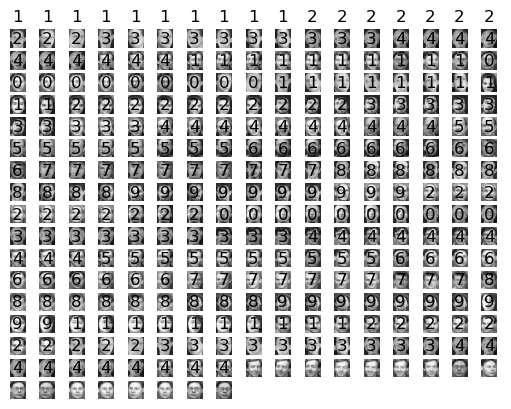

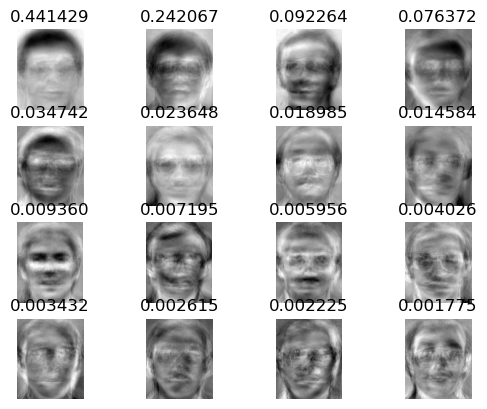

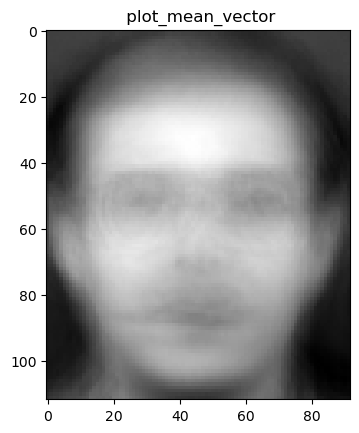

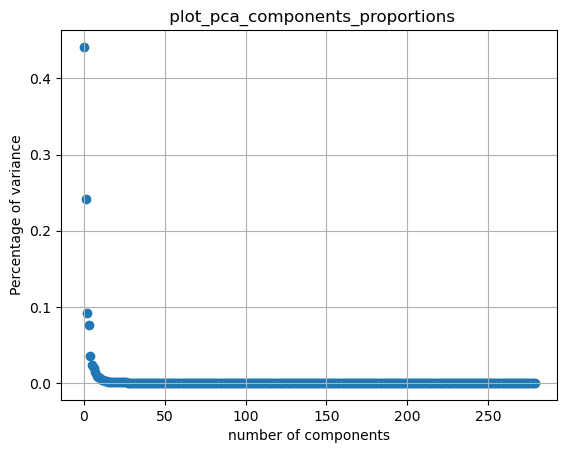

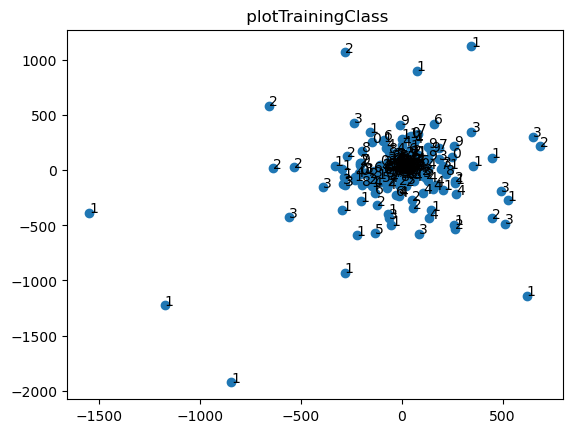

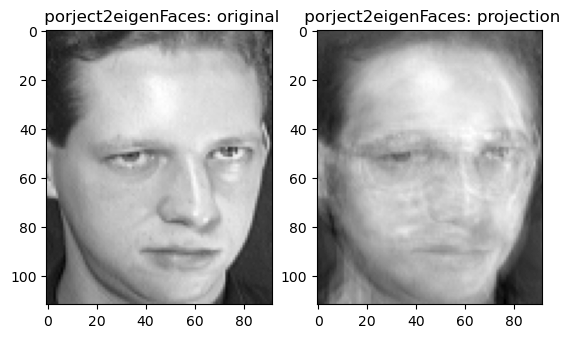

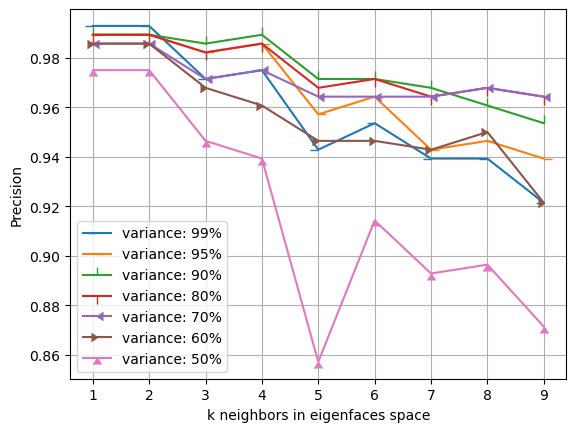

In [23]:
class EigenFace(object):
    # load images, and start other processing
    def __init__(self, image_path=IMAGE_DIR,suffix="*.*",variance_pct=0.99,knn=5):
        # the least variance percentage we want the top K eigen vector to cover.
        self.variance_pct = variance_pct
        # don't use the top k eigen vectors
        self.knn = knn
        # the original images corresponding to its name
        self.image_dictionary = []

        image_names = []
        for root, dirnames, filenames in os.walk(image_path):
            for filename in fnmatch.filter(filenames, suffix):
                image_names.append(os.path.join(root, filename))
        # image_names = [image for image in os.listdir(image_path) if not image.startswith('.')]
        for idx,image_name in enumerate(image_names):
            img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE).astype(np.float64)
            if idx == 0:
                # the shape of the image. They are sopposed to be the same
                self.imgShape = img.shape
                # the normalized image matrix. it will be normalized by subtracting from the average image later
                self.vector_matrix = np.zeros((self.imgShape[0]*self.imgShape[1], len(image_names)),dtype=np.float64)
            #img = cv2.pyrDown(img)
            self.image_dictionary.append((image_name,img,self.getClassFromName(image_name)))
            self.vector_matrix[:,idx] = img.flatten()

        subjects = set()
        for _,_,subject in self.image_dictionary:
            subjects.add(subject)
        print ("loaded total image: %d, subject number is: %d" % (len(self.image_dictionary), len(subjects)))

        self.get_eigen()
        self.getWeight4Training()

    # use the method describing in Turk and Pentland's paper.
    def get_eigen(self):
        mean_vector = self.vector_matrix.mean(axis=1)
        for ii in range(self.vector_matrix.shape[1]):
            self.vector_matrix[:,ii] -= mean_vector
        shape = self.vector_matrix.shape
         # if there is huge number of training images. Usually go for 'else' branch.
        if (shape[0]<shape[1]):
            _,lamb, u = np.linalg.svd(np.dot(self.vector_matrix,self.vector_matrix.T))
            u = u.T
            # pass
        else:
            _,lamb, v = np.linalg.svd(np.dot(self.vector_matrix.T, self.vector_matrix))
            v = v.T
            u = np.dot(self.vector_matrix,v)
            # Normalizing u to ||u||=1
            norm = np.linalg.norm(u,axis=0)
            u = u / norm
            #lamb = lamb * norm  # don't need to do this normalized to eigenvalues
        # print (lamb)
        # print (np.linalg.norm(u,axis=0))
        standard_deviation = lamb**2/float(len(lamb))
        variance_proportion = standard_deviation / np.sum(standard_deviation)
        eigen = Bunch()
        eigen.lamb = lamb
        eigen.u = u
        eigen.variance_proportion = variance_proportion
        eigen.mean_vector = mean_vector
        self.eigen = eigen
        # The top K eigen value that represent 'most' of the variance in the training data
        self.K = self.get_number_of_components_to_preserve_variance(self.variance_pct)
        print ("get_number_of_components_to_preserve_variance: var=%.2f, K=%d" % (self.variance_pct,self.K))


    def getWeight4Training(self):
        self.weightTraining = np.dot(self.eigen.u.T, self.vector_matrix)
        return self.weightTraining

    def get_eigen_value_distribution(self):
        data = np.cumsum(self.eigen.lamb) / np.sum(self.eigen.lamb)
        return data

    def get_number_of_components_to_preserve_variance(self, variance=.95):
        for ii, eigen_value_cumsum in enumerate(self.get_eigen_value_distribution()):
            if eigen_value_cumsum >= variance:
                #print ("get_number_of_components_to_preserve_variance: var=%.2f, K=%d" % (variance,ii))
                return ii

    def getWeight4NormalizedImg(self, imgNormlized):
        return np.dot(self.eigen.u.T,imgNormlized)
    def getWeight4img(self,img):
        return self.getWeight4NormalizedImg(img.flatten-self.eigen.mean_vector)

    def porject2eigenFaces(self, img,k=-1):
        if k<0:
            k = self.K
        ws = self.getWeight4NormalizedImg(img)
        u = self.eigen.u
        # imgNew = np.dot(u,ws)
        imgNew = np.dot(self.eigen.u[:,0:k],ws[0:k])
        fig,axarr = plt.subplots(1,2)
        axarr[0].set_title(" porject2eigenFaces: original")
        axarr[0].imshow(img.reshape(self.imgShape) + self.get_average_weight_matrix(), cmap=plt.cm.gray)
        # axarr[0].imshow(img.reshape(self.imgShape) , cmap=plt.cm.gray)
        axarr[1].set_title(" porject2eigenFaces: projection")
        axarr[1].imshow(imgNew.reshape(self.imgShape) + self.get_average_weight_matrix(), cmap=plt.cm.gray)
        # axarr[1].imshow(imgNew.reshape(self.imgShape), cmap=plt.cm.gray)
        return imgNew

    # evaluate on training data using knn
    def eval(self, knn_k=-1,Kpca=-1):
        if knn_k <= 0:
            knn_k = self.knn
        knn_k += 1  # exclude itself
        if Kpca<0:
            Kpca = self.K

        responses = []
        for name,img,label in self.image_dictionary:
            responses.append(label)
        knn = cv2.ml.KNearest_create()
        train_data = self.weightTraining[0:Kpca, :].T.astype(np.float32)
        train_labels = np.asarray(responses, dtype=np.float32)
        knn.train(train_data, cv2.ml.ROW_SAMPLE, train_labels)
        # we have to discard the first predict result, since it has to be itself
        ret, results, neighbours2, dist = knn.findNearest(self.weightTraining[0:Kpca, :].T.astype(np.float32), knn_k)
        neighbours = neighbours2[:,1:]
        eval_data = []
        for idx,nb in enumerate(neighbours):
            neighbours_count = []
            for n in nb:
                neighbours_count.append(nb.tolist().count(n))
            vote = nb[neighbours_count.index(max(neighbours_count))]
            eval_data.append((vote,responses[idx]))
            # print ("predict:%s, neight: %s, label: %d" % (str(vote),str(nb), responses[idx]))
        return eval_data

    def get_eval(self, knn_k=-1,Kpca=-1):
        eval_data = self.eval(knn_k,Kpca)
        tp = 0
        fp = 0
        for pair in eval_data:
            if int(pair[0]) == int(pair[1]):
                tp += 1
            else:
                fp += 1
        precision = 1.0*tp/(tp+fp)
        return precision


    ################   --------- show the result --------- ###################

    def plot_image_dictionary(self):
        dictionary = self.image_dictionary
        num_row_x = num_row_y = int(np.floor(np.sqrt(len(dictionary)-1))) + 1
        fig, axarr = plt.subplots(num_row_x, num_row_y)
        for ii, (name, v,_) in enumerate(dictionary):
            div, rem = divmod(ii, num_row_y)
            axarr[div, rem].imshow(v, cmap=plt.cm.gray)
            axarr[div, rem].set_title('{}'.format(self.getClassFromName(name)).capitalize())
            axarr[div, rem].axis('off')
            if ii == len(dictionary) - 1:
                for jj in range(ii, num_row_x*num_row_y):
                    div, rem = divmod(jj, num_row_y)
                    axarr[div, rem].axis('off')

    def plot_eigen_vector(self, n_eigen=-1, nth=-1):
        if nth is -1:
            self.plot_eigen_vectors(n_eigen)
        else:
            plt.figure()
            plt.imshow(np.reshape(self.eigen.u[:,nth], self.imgShape), cmap=plt.cm.gray)

    def plot_eigen_vectors(self,number=-1):
        if number<0:
            number = self.eigen.u.shape[1]
        num_row_x = num_row_y = int(np.floor(np.sqrt(number-1))) + 1
        fig, axarr = plt.subplots(num_row_x, num_row_y)
        for ii in range(number):
            div, rem = divmod(ii, num_row_y)
            axarr[div, rem].imshow(np.reshape(self.eigen.u[:,ii], self.imgShape), cmap=plt.cm.gray)
            axarr[div, rem].set_title("%.6f" % self.eigen.variance_proportion[ii])
            axarr[div, rem].axis('off')
            if ii == number - 1:
                for jj in range(ii, num_row_x*num_row_y):
                    div, rem = divmod(jj, num_row_y)
                    axarr[div, rem].axis('off')

    def get_average_weight_matrix(self):
        return np.reshape(self.eigen.mean_vector, self.imgShape)

    def plot_mean_vector(self):
        fig,axarr = plt.subplots()
        axarr.set_title(" plot_mean_vector")
        axarr.imshow(self.get_average_weight_matrix(), cmap=plt.cm.gray)

    def plot_pca_components_proportions(self):
        fig,axarr = plt.subplots()
        plt.grid(True)
        plt.xlabel('number of components')
        plt.ylabel('Percentage of variance')
        axarr.set_title(" plot_pca_components_proportions")
        axarr.scatter(range(self.eigen.variance_proportion.size), self.eigen.variance_proportion)


    def plot_eigen_value_distribution(self):
        fig,axarr = plt.subplots()
        plt.grid(True)
        plt.xlabel('number of components')
        plt.ylabel('Percentage of variance')
        axarr.set_title(" plot_eigen_value_distribution")
        data = np.cumsum(self.eigen.lamb,) / np.sum(self.eigen.lamb)
        axarr.scatter(range(data.size), data)

    # plot the weights of top 2 component of all the training image
    def plotTrainingClass(self):
        fig,axarr = plt.subplots()
        axarr.set_title(" plotTrainingClass")
        ws = self.weightTraining
        axarr.scatter(ws[:,0],ws[:,1])
        for idx in range(0,ws.shape[0]):
            name = self.getClassFromName(self.image_dictionary[idx][0])
            axarr.text(ws[idx,0],ws[idx,1],name)
    def getClassFromName(self,fileName,lastSubdir=True):
        if lastSubdir:
            name = os.path.basename(os.path.dirname(fileName))
        else:
            name = os.path.basename(fileName)
        mat = re.match(".*(\d+).*", name)
        if mat != None:
            return int(mat.group(1))
        else:
            return name.__hash__()

### for att face dataset
eigen_face = EigenFace(variance_pct=0.99,knn=1)
### for yale face dataset
#eigen_face = EigenFace(variance_pct=0.99,knn=1,suffix="*[0-9].pgm")
eigen_face.plot_image_dictionary()
eigen_face.plot_eigen_vector(16)
eigen_face.plot_mean_vector()
eigen_face.plot_pca_components_proportions()
# eigen_face.plot_eigen_value_distribution()
eigen_face.plotTrainingClass()
eigen_face.K = eigen_face.get_number_of_components_to_preserve_variance(0.80)
print (eigen_face.K)
eigen_face.porject2eigenFaces(eigen_face.vector_matrix[:,1],-1)

plt.figure()
plt.grid(True)
plt.xlabel('k neighbors in eigenfaces space')
plt.ylabel('Precision')
precisions = []
for i,var in enumerate([0.99,0.95,0.90,0.80,0.70,0.60,0.50]):
    precisions.append([])
    for j,knn_k in enumerate(range(1,10)):
        eigen_face.K = eigen_face.get_number_of_components_to_preserve_variance(var)
        pre = eigen_face.get_eval(knn_k)
        precisions[i].append(pre)
        print("knn_k: %2d, variance:%.2f(%d),\tprecision: %.4f" % (knn_k, var, eigen_face.K, pre))
    plt.plot(range(1,10),precisions[i],label="variance: %.0f%%" % (var*100),marker=i)
plt.legend(loc='best')

precisions = np.asarray(precisions)
print (precisions)
plt.show()